## Scrape tweets for the hashtag #datascience 

In [1]:
import tweepy

In [6]:
consumer_key = 'cDsaKW8ryfu2AazKwtRqUe2xs'
consumer_secret = '5D1TPs4waxphoiJe64vgA6pwKubcQACvVYMuJYDCTSs0gcUVgv'

access_token = '2564556437-pkofYi8OEUWCv0sk92N6P2vT3ZI1ZlUdolhPsDH'
access_secret = 'mcsuNoAMJkPQhhtwGKe0cqArlodZfisL8VhXafHNF5frM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [155]:
# Define the search term and the date_since date as variables
search_words = "#datascience"


In [156]:
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en").items(501)
tweets

In [157]:
tweets_df = pd.DataFrame()
for tweet in tweets:
    cur_tweet = {'text':tweet.text,
                'likes':tweet.favorite_count,
                
                'created_at':tweet.created_at,
                'source':tweet.source,
                 'user_name':tweet.user.screen_name}
    tweets_df = tweets_df.append(cur_tweet,ignore_index=True)
tweets_df.tail()

,created_at,likes,source,text,user_name
496,2019-09-30 15:57:48,0.0,Twitter Web App,RT @AnalyticsVidhya: The Most Comprehensive Gu...,addictive_ds
497,2019-09-30 15:57:37,0.0,Twitter for iPhone,RT @BSGCatUCS: We need your help! If you're an...,BCSShropshire
498,2019-09-30 15:57:23,0.0,Magnifintech,RT @reach2ratan: German police arrest suspects...,magnifintech
499,2019-09-30 15:57:16,0.0,Twitter for iPhone,RT @BSGCatUCS: We need your help! If you're an...,FraggleWorks
500,2019-09-30 15:57:03,0.0,RTML,RT @TheDXEngineer: mt: @mikequindazzi\ncopy @A...,TheCuriousLuke


## minute wise number of tweets

In [163]:
# extracting mintues to draw a line charts
from datetime import date

tweets_df['Mintues'] = tweets_df['created_at'].dt.minute

In [266]:
minute_wise_twt = tweets_df.groupby('Mintues')['text'].size().reset_index()
minute_wise_twt.head().sort_values(by='text',ascending=False)


,Mintues,text
0,0,21
1,1,17
2,2,17
3,3,9
4,4,9


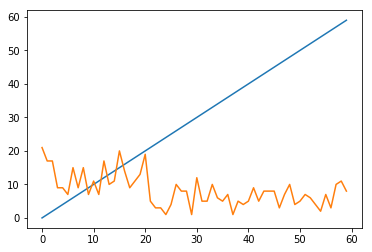

In [267]:
import matplotlib.pyplot as plt

plt.plot(minute_wise_twt)
plt.show()

---

## Top user based on most number of tweets

In [161]:
most_tweet = tweets_df.groupby('user_name')['text'].size().reset_index()
most_tweet.sort_values(by='text',ascending=False).head(10)

,user_name,text
298,rstatstweet,12
149,Spain_EU_Dubai,12
161,TheCuriousLuke,9
31,ArkangelScrap,8
181,akdm_bot,8
88,JustBeMentalist,7
78,IainLJBrown,6
143,ServerlessFan,6
226,gp_pulipaka,5
320,thomashilbig2,5


---

### Identity total number of hashtags in each tweet. 

In [121]:
tweets_df['text'].value_counts()

RT @PyImageSearch: New tutorial! 🚀 Learn how to use the Rectified Adam optimizer with #Keras and #DeepLearning to:\n1. Obtain higher accurac…                     18
RT @AISOMA_AG: Intelligent #Automation -The Difference between #RoboticProcessAutomation  and #AI\n\n👉https://t.co/NUpGAti7vR\n\n#FinTech #RPA…                   17
RT @EmekaOkoye: Training in Enugu,Lagos &amp; Abuja #Nigeria.\n\nIf interested in learning Symbolic #AI:\n1. Semantic Modeling &amp; Knowledge Represe…            9
RT @KirkDBorne: 10-page (PDF) #DataScience Cheat Sheet covers concepts in Statistical Learning, #MachineLearning, #DeepLearning, Probabilit…                       9
RT @IainLJBrown: Unbridled Adoption Of Artificial Intelligence May Result In Millions Of Job Losses And Require Massive Retraining For Thos…                       8
RT @gp_pulipaka: 9 Tutorials To Become A Pro In #MachineLearning Framework. #BigData #Analytics #DataScience #AI #IoT #IIoT #PyTorch #Pytho…                       7
RT @rubics

In [246]:
import re

each_hastag = tweets_df['text'].apply(lambda x : re.findall(r"#(\w+)", x))

In [247]:
tweets_df['hashtag_total'] = each_hastag

In [159]:
tweets_df.text.str.extractall(r'(\#\w+)')[0].value_counts()


#DataScience               216
#AI                        134
#MachineLearning           123
#BigData                   116
#Analytics                  75
#IoT                        73
#DeepLearning               63
#IIoT                       37
#ArtificialIntelligence     37
#datascience                37
#Python                     27
#rstats                     18
#PyTorch                    18
#Technology                 17
#Ma                         17
#InternetofThings           15
#Keras                      15
#Tech                       15
#ML                         14
#CyberCrime                 14
#TensorFlow                 12
#data                       11
#CyberSecurity              11
#Pytho                      11
#Rein                       10
#KSQL                        9
#MQTT                        9
#detection                   9
#ReinforcementLearn          9
#Fintec                      9
                          ... 
#email                       1
#compute

In [250]:
total_hastag = tweets_df.groupby('user_name')['hashtag_total'].size().reset_index()
total_hastag.head()

,user_name,hashtag_total
0,100DaysOfMLCode,1
1,100xcode,2
2,13StoneHeart,1
3,2601Manish,1
4,ADSA_ExecDir,1


---

### •	Identity those users who have used #datascience as well as #machinelearning.Plot a bar chart of such top 10 users

In [203]:
def _hashtag(input_text):
    tag=[]
    for i in input_text:
        word=re.findall('#[dD]atascience|#[mM]achinelearning',i)
        tag.append(word)
    return tag

In [204]:
dsml_tag = _hashtag(tweets_df['text'])

In [205]:
tweets_df['ds_ml_tag'] = dsml_tag

In [220]:
only_ml_ds_tag = tweets_df.groupby('user_name')['ds_ml_tag'].size().reset_index()
only_ml_ds_tag = only_ml_ds_tag.sort_values(by='ds_ml_tag',ascending=False).head(10)
only_ml_ds_tag

,user_name,ds_ml_tag
298,rstatstweet,12
149,Spain_EU_Dubai,12
161,TheCuriousLuke,9
31,ArkangelScrap,8
181,akdm_bot,8
88,JustBeMentalist,7
78,IainLJBrown,6
143,ServerlessFan,6
226,gp_pulipaka,5
320,thomashilbig2,5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

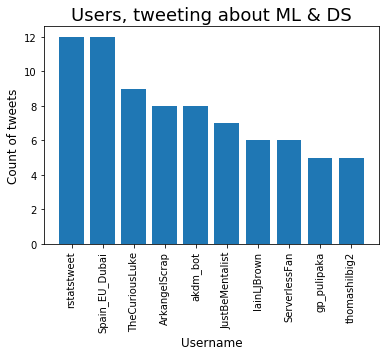

In [242]:
plt.bar(only_ml_ds_tag['user_name'],only_ml_ds_tag['ds_ml_tag'])
plt.title('Users, tweeting about ML & DS',fontsize=18)
plt.xlabel('Username',fontsize=12)
plt.ylabel('Count of tweets',fontsize=12)
plt.xticks(rotation =90)

----

## Using Narendra Modi’s tweet

In [494]:
modi_tweet = pd.read_csv("narendramodi_tweets.csv")
modi_tweet.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.260000e+17,1406,4903,31-01-2017 11:00,The President's address wonderfully encapsulat...,en,False,26809964,1641,1,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.260000e+17,907,2877,31-01-2017 10:59,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.260000e+17,694,0,31-01-2017 10:52,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.260000e+17,666,0,31-01-2017 10:52,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.260000e+17,716,0,31-01-2017 10:52,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [495]:
modi_tweet['new_text'] = modi_tweet['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [496]:
modi_tweet['new_text'][5]

'RT @PMOIndia: Financial inclusion for poverty alleviation. '

In [499]:
# function to remove RT @PMOIndia: 
def _remove_col(input_txt):
    if ":" in input_txt:
        return input_txt.split(":")[1]
    else:
        return input_txt
    
modi_tweet["new_text"] = modi_tweet["new_text"].apply(_remove_col)
modi_tweet.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,new_text
0,8.260000e+17,1406,4903,31-01-2017 11:00,The President's address wonderfully encapsulat...,en,False,26809964,1641,1,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,The President's address wonderfully encapsulat...
1,8.260000e+17,907,2877,31-01-2017 10:59,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Rashtrapati Ji's address to both Houses of Par...
2,8.260000e+17,694,0,31-01-2017 10:52,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Empowering the marginalised.
3,8.260000e+17,666,0,31-01-2017 10:52,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Commitment to welfare of farmers.
4,8.260000e+17,716,0,31-01-2017 10:52,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Improving the quality of life for the poor.


In [500]:
modi_tweet['new_text'][5]

' Financial inclusion for poverty alleviation. '

In [501]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

#Creating a Function
text_polar = lambda text:senti.polarity_scores(text)['compound']

In [502]:
modi_tweet['Polarity_Score'] =modi_tweet['new_text'].apply(text_polar)
modi_tweet.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,new_text,Polarity_Score
0,8.260000e+17,1406,4903,31-01-2017 11:00,The President's address wonderfully encapsulat...,en,False,26809964,1641,1,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,The President's address wonderfully encapsulat...,0.7650
1,8.260000e+17,907,2877,31-01-2017 10:59,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Rashtrapati Ji's address to both Houses of Par...,0.0000
2,8.260000e+17,694,0,31-01-2017 10:52,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Empowering the marginalised.,0.0000
3,8.260000e+17,666,0,31-01-2017 10:52,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Commitment to welfare of farmers.,0.3818
4,8.260000e+17,716,0,31-01-2017 10:52,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Improving the quality of life for the poor.,-0.0772


### •	Positive (score > 0.05)
### •	Negative (score < -0.05)
### •	Neutral (-0.05 <= score <= 0.05)


In [503]:
def _score(x):
    if x>0.5:
        return 'Positive'
    elif -0.5<=x<=0.5:
        return 'Neutral'
    else:
        return 'Negative'
    
modi_tweet['Sentiment_cat'] = modi_tweet['Polarity_Score'].apply(_score)

In [504]:
modi_tweet.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source,new_text,Polarity_Score,Sentiment_cat
0,8.260000e+17,1406,4903,31-01-2017 11:00,The President's address wonderfully encapsulat...,en,False,26809964,1641,1,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,The President's address wonderfully encapsulat...,0.7650,Positive
1,8.260000e+17,907,2877,31-01-2017 10:59,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Rashtrapati Ji's address to both Houses of Par...,0.0000,Neutral
2,8.260000e+17,694,0,31-01-2017 10:52,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Empowering the marginalised.,0.0000,Neutral
3,8.260000e+17,666,0,31-01-2017 10:52,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Commitment to welfare of farmers.,0.3818,Neutral
4,8.260000e+17,716,0,31-01-2017 10:52,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964,1641,0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client,Improving the quality of life for the poor.,-0.0772,Neutral


In [505]:
tot_no_sentiment_wise = pd.DataFrame(modi_tweet['Sentiment_cat'].value_counts())
tot_no_sentiment_wise

,Sentiment_cat
Neutral,1568
Positive,1326
Negative,93


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

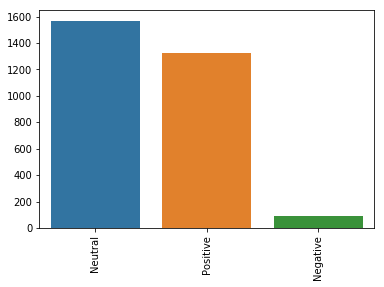

In [506]:
x=tot_no_sentiment_wise.index
y=tot_no_sentiment_wise['Sentiment_cat'].values
sns.barplot(x = x , y = y)
plt.xticks(rotation = 90)

---

## •	Create a multi-line chart for comparing no. of positive, negative and neutral reviews for each day.

In [507]:
# converting created at into a datetime object to get each day

modi_tweet['Date'] = pd.to_datetime(modi_tweet['created_at'])

In [508]:
modi_tweet.dtypes

id                             float64
retweets_count                   int64
favorite_count                   int64
created_at                      object
text                            object
lang                            object
retweeted                         bool
followers_count                  int64
friends_count                    int64
hashtags_count                   int64
description                     object
location                        object
background_image_url            object
source                          object
new_text                        object
Polarity_Score                 float64
Sentiment_cat                   object
Date                    datetime64[ns]
dtype: object

In [509]:
#getting the day from datetime column

from datetime import date


modi_tweet['Day'] = modi_tweet['Date'].dt.day

In [510]:
# extracting the no. of  postive,negative & neutral tweets for each day


each_day_tweet = modi_tweet.groupby(['Day','Sentiment_cat'])['new_text'].size().reset_index()
each_day_tweet.head()

,Day,Sentiment_cat,new_text
0,1,Negative,3
1,1,Neutral,43
2,1,Positive,40
3,3,Neutral,9
4,3,Positive,15


In [419]:
pivot_df = each_day_tweet.pivot(index='Day',columns='Sentiment_cat',values='new_text')
pivot_df

Sentiment_cat,Negative,Neutral,Positive
Day,,,
1,3.0,43.0,40.0
3,NaN,9.0,15.0
4,5.0,51.0,41.0
5,2.0,66.0,43.0
6,4.0,84.0,64.0
7,5.0,72.0,125.0
8,4.0,51.0,36.0
9,1.0,49.0,45.0
10,NaN,48.0,36.0


### plotting the multiline chart

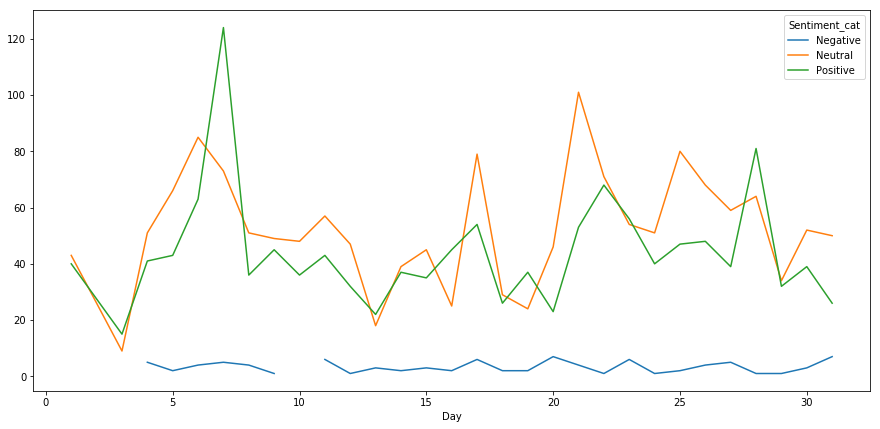

In [511]:
fig, ax = plt.subplots(figsize=(15,7))
modi_tweet.groupby(['Day','Sentiment_cat']).count()['new_text'].unstack().plot(ax=ax)

---

## •	Using Naïve Bayes to predict the sentiment 

In [512]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

train_x, validate_x, train_y, validate_y = train_test_split(modi_tweet['new_text'], modi_tweet['Sentiment_cat'],test_size=0.3, random_state =1)


train_x.shape, validate_x.shape, train_y.shape, validate_y.shape

((2090,), (897,), (2090,), (897,))

In [513]:
vec = CountVectorizer().fit(train_x)
train_dtm = vec.transform(train_x)
validate_dtm = vec.transform(validate_x)

In [514]:
pd.DataFrame(train_dtm[:5].toarray())     #'  '---> to see 4 docs of sparse matrix'

,0,1,2,3,4,5,6,7,8,9,...,5792,5793,5794,5795,5796,5797,5798,5799,5800,5801
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## •	Use Naïve Bayes to predict the sentiment and calculate the accuracy score

In [515]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(train_dtm,train_y)
validate_pred = model.predict(validate_dtm)



####  for “micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F, while “weighted” averaging may produce an F-score that is not between precision and recall.

In [516]:
from sklearn.metrics import f1_score

f1_score(validate_y, validate_pred,average='micro')




0.7246376811594203

---

### •	Classify the following tweet: 
“India is a great country. It has one of the oldest civilizations. It has its own heritage culture. People from different caste, creed, religion, speaking different languages stay together. However, with all the political parties trying to get votes, India has seen various caste or religion-based riots and protests.”


In [517]:
test_str = 'India is a great country. It has one of the oldest civilizations. It has its own heritage culture. People from different caste, creed, religion, speaking different languages stay together. However, with all the political parties trying to get votes, India has seen various caste or religion-based riots and protests.'
test_string = pd.Series(test_str)

## Predictions

In [518]:
test = vec.transform(test_string)
test.shape

(1, 5802)

In [519]:
model.predict(test)

array(['Positive'], dtype='<U8')

---